<a id="indice"></a> 
## Índice de la notebook

[1) BUILDING TENSORS](#1)

[2) BASIC OPERATIONS IN PYTORCH](#2)

[3) SLICING IN PYTORCH](#3)

[4) NUMPY AND PYTORCH](#4)

[5) USING GPU IN PYTORCH](#5)

[6) GRADIENTS IN PYTORCH](#6)

[7) BACKPROPAGATION](#7)

[8) OPTIMAZATION AND OPTIMAZERS](#8)

[9) GENERAL TRAINING PIPELINE](#9)

[10) IMPLEMENTING LINEAR REGRESSION (REGRESSION)](#10)

[11) IMPLEMENTING LOGISTIC REGRESSION (CLASSIFICATION)](#11)

[12) DATASETS AND DATALOADERS CLASSES](#12)

[13) DATASETS TRANSFORMS](#13)

[14) SOFTMAX AND CROSS-ENTROPY](#14) <br>
        - [BINARY CLASS CLASSIFICATION PROBLEMS](#15) <br>
        - [MULTI CLASS CLASSIFICATION PROBLEMS](#16)

[15) FEED FORWARD NETWORKS](#17)

[16) CONVOLUTIONAL NEURAL NET (CNN)](#18)

[17) TENSORBOARD WITH PYTORCH](#19)

[18) SAVING AND LOADING MODELS](#20)


<a id="1"></a> 
### 1) BUILDING TENSORS

[Ir a índice](#indice)

In [1]:
import torch 

x = torch.empty(2,2,3)
x

KeyboardInterrupt: 

In [ ]:
x = torch.rand(2,2)
x

tensor([[0.4484, 0.0385],
        [0.1815, 0.4336]])

In [ ]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
x = torch.ones(2,2)
(x.dtype)

torch.float32

In [ ]:
# double its a float64 which its different from dtype = torch.float which is float 32
x = torch.ones(2,2, dtype = torch.double)
(x.dtype)

torch.float64

In [ ]:
x.size()

torch.Size([2, 2])

In [ ]:
torch.tensor([2.5, 0.7], dtype = torch.double)

tensor([2.5000, 0.7000], dtype=torch.float64)

<a id="2"></a> 
### 2) BASIC OPERATIONS IN PYTORCH
[Ir a índice](#indice)



In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x, y

(tensor([[0.9666, 0.8989],
         [0.6205, 0.7627]]),
 tensor([[0.7642, 0.7215],
         [0.3198, 0.2377]]))

In [ ]:
z = x + y
z = torch.add(x,y)
z

tensor([[1.7308, 1.6204],
        [0.9403, 1.0004]])

In [ ]:
print(y)
y.add_(x) # Each function in pytorch which has '_' will do an Inplace Operation
# will update the value each.

print(f'new tensor with x added: \n{y}')

tensor([[0.7642, 0.7215],
        [0.3198, 0.2377]])
new tensor with x added: 
tensor([[1.7308, 1.6204],
        [0.9403, 1.0004]])


In [ ]:
z = x - y
z = torch.sub(x, y)
z

tensor([[-0.7642, -0.7215],
        [-0.3198, -0.2377]])

In [ ]:
z = x * y
z = torch.mul(x,y)
z

tensor([[1.6730, 1.4565],
        [0.5835, 0.7630]])

In [ ]:
x.mul_(y)

tensor([[1.6730, 1.4565],
        [0.5835, 0.7630]])

In [ ]:
z = x / y
z = torch.div(x,y)
z

tensor([[0.9666, 0.8989],
        [0.6205, 0.7627]])

<a id="3"></a> 
### 3) SLICING IN PYTORCH
[Ir a índice](#indice)


In [ ]:
x = torch.rand(5, 2)
print(x)

print(f'Only print the first column and all the rows: \n{x[:,0]}')
print(f'\nOnly print the second row and all the columns: \n{x[1,:]}')

tensor([[0.7110, 0.0704],
        [0.8379, 0.0723],
        [0.0887, 0.2006],
        [0.9964, 0.0470],
        [0.8094, 0.5816]])
Only print the first column and all the rows: 
tensor([0.7110, 0.8379, 0.0887, 0.9964, 0.8094])

Only print the second row and all the columns: 
tensor([0.8379, 0.0723])


In [ ]:
x[1,1].item() # para seleccionar 

0.07225489616394043

In [ ]:
x = torch.rand(4,4)
print(x)
print('\n')
y = x.view(16) #reshape
print(y)

tensor([[0.6450, 0.6242, 0.8454, 0.2802],
        [0.4245, 0.1617, 0.9815, 0.0456],
        [0.5908, 0.6886, 0.1957, 0.0879],
        [0.9852, 0.1074, 0.9075, 0.4201]])


tensor([0.6450, 0.6242, 0.8454, 0.2802, 0.4245, 0.1617, 0.9815, 0.0456, 0.5908,
        0.6886, 0.1957, 0.0879, 0.9852, 0.1074, 0.9075, 0.4201])


In [ ]:
y = x.view(-1, 2) #reshape, if we put '-1', and one of the dimentions,
                  # pytorch will automatically determinate the right size
y.shape

torch.Size([8, 2])

<a id="4"></a>
### 4) NUMPY AND PYTORCH
[Ir a índice](#indice)

In [ ]:
import numpy as np

a = torch.ones(5)
print(type(a))


b = a.numpy()
print(type(b))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [ ]:
a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

<a id="5"></a> 
### 5) USING GPU IN PYTORCH
[Ir a índice](#indice)

In [ ]:

# FOR WINDOWS
if torch.cuda.is_available(): # Check if there is an GPU avaible
    device=torch.device("cuda")
    x = torch.ones(5, device = device) # this creates a tensor and put it in the GPU
    
    y = torch.ones(5)
    y = y.to(device) # move the tensor to the device (GPU)
    
# If we want to convert a tensor to numpy array, we have first to send it to cpu, numpy does't work on gpu

    z = x + y
    z = z.to("cpu")

<a id="6"></a> 
### 6) GRADIENTS IN PYTORCH
[Ir a índice](#indice)

In [ ]:
x = torch.ones(5, requires_grad= True, dtype= torch.double)
x

tensor([1., 1., 1., 1., 1.], dtype=torch.float64, requires_grad=True)

In [ ]:
x = torch.randn(3, requires_grad = True) # random normal distribution istead uniform

y = x + 2
y

tensor([1.5796, 4.3735, 0.1492], grad_fn=<AddBackward0>)

In [ ]:
z = y*y*2
z = z.mean()
z

tensor(14.4300, grad_fn=<MeanBackward0>)

In [ ]:
z.backward() # dz/dx (note: only works if "z" is scalar)
# each time we call the .backward() method the gradient will be sum up the last value calculated

x.grad #dz/dx

tensor([2.1062, 5.8313, 0.1989])

In [ ]:
# To deatach the tracking of the gradiant in pytorch
# 3 ways
# 1: x.requires_grad_(False)
# 2: x.detach()
# 3: with torch.no_grad():

x.requires_grad_(False)

tensor([-0.4204,  2.3735, -1.8508])

In [ ]:
y = x.detach() # creates a new vector with the same values but not requires gradient
y

tensor([-0.4204,  2.3735, -1.8508])

In [ ]:
with torch.no_grad():
    y = x + 2
    print(y) # here we see that our y doesn't have the gradient.

tensor([1.5796, 4.3735, 0.1492])


In [ ]:
# HERE WE SEE HOW THE .backward() METHOD ADD UP THE GRADIENTS
weights = torch.ones(4, requires_grad = True)

for epoch in range(4):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


In [ ]:
# SOLUTION
weights = torch.ones(4, requires_grad = True)

for epoch in range(4):
    model_output = (weights * 3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_() # ERASE THE GRADIENT FROM A VARIABLE

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


<a id="7"></a> 
### 7) BACKPROPAGATION
[Ir a índice](#indice)

In [ ]:
x = torch.tensor(1.)
y = torch.tensor(2.)

w = torch.tensor(1., requires_grad = True)

# forward pass and compute the loss
y_hat = w * x
loss = (y - y_hat)**2

print(loss)

# backward pass
loss.backward()
print(w.grad) #dloss/dw (returns the value in the leaf node)

### update the weights
### next forward and backward passes

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


<a id="8"></a> 
### 8)OPTIMAZATION AND OPTIMAZERS<br>
GRADIENTS OPTIMIZATION FROM SCRATCH USING NUMPY

[Ir a índice](#indice)

In [ ]:
import numpy as np

# f = w * x
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (y - w*x)**2
# dJ/dw = 2*x * 1/N * (y - w*x)
def gradient(x, y, y_predicted):
    return (np.dot(2*x, y_predicted - y)).mean()

print(f'Prediction before training: f(5): {forward(5):.3f}')

# Training
learning_rate = 1e-2
n_iter = 10

for epoch in range(n_iter):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w = w - (learning_rate * dw) # w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch{epoch + 1} : w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5): {forward(5):.3f}')        
    

Prediction before training: f(5): 0.000
epoch1 : w = 1.200, loss = 30.00000000
epoch2 : w = 1.680, loss = 4.79999924
epoch3 : w = 1.872, loss = 0.76800019
epoch4 : w = 1.949, loss = 0.12288000
epoch5 : w = 1.980, loss = 0.01966083
epoch6 : w = 1.992, loss = 0.00314570
epoch7 : w = 1.997, loss = 0.00050332
epoch8 : w = 1.999, loss = 0.00008053
epoch9 : w = 1.999, loss = 0.00001288
epoch10 : w = 2.000, loss = 0.00000206
Prediction after training: f(5): 9.999


### NOW WITH PYTORCH

In [ ]:
import torch

# f = w * x
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor([0.], dtype = torch.float32, requires_grad = True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

print(f'Prediction before training: f(5): {forward(5)}')

# Training
learning_rate = 1e-2
n_iter = 100

for epoch in range(n_iter):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():    
        w -= learning_rate * w.grad
        
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch{epoch + 1} : w = {w}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5): {forward(5).item()}')        

Prediction before training: f(5): tensor([0.], grad_fn=<MulBackward0>)
epoch1 : w = tensor([0.3000], requires_grad=True), loss = 30.00000000
epoch11 : w = tensor([1.6653], requires_grad=True), loss = 1.16278565
epoch21 : w = tensor([1.9341], requires_grad=True), loss = 0.04506890
epoch31 : w = tensor([1.9870], requires_grad=True), loss = 0.00174685
epoch41 : w = tensor([1.9974], requires_grad=True), loss = 0.00006770
epoch51 : w = tensor([1.9995], requires_grad=True), loss = 0.00000262
epoch61 : w = tensor([1.9999], requires_grad=True), loss = 0.00000010
epoch71 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
epoch81 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
epoch91 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
Prediction after training: f(5): 9.999998092651367


<a id="9"></a> 
### 9)GENERAL TRAINING PIPELINE<br>
- **1) Desing model (input, output size, forward pass)**
- **2) Construct loss and optimizer**
- **3) Training loop**

    - **a) forward pass and loss calculation:** compute the prediction and the loss value
    - **b) backward pass:** calculate the gradients
    - **c) update the weights** `optimizer.step()`,and reset the gradient `optimizer.zero_grad()`


Now instead of using our loss function, we will  `import torch.nn as nn` and get the loss function from there.

And we will use the optimizer provided from `torch.optim.SGD()` instead of actualize the weights by hand:

    - update weights : optimizer.step()    
    - zero gradients: optimizer.zero_grad()

[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn

# f = w * x
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor([0.], dtype = torch.float32, requires_grad = True)

# model prediction
def forward(x):
    return w * x


print(f'Prediction before training: f(5): {forward(5)}')

# Training
learning_rate = 1e-2
n_iter = 100

loss = nn.MSELoss() #MSE
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iter):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch{epoch + 1} : w = {w}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5): {forward(5).item()}')      

Prediction before training: f(5): tensor([0.], grad_fn=<MulBackward0>)
epoch1 : w = tensor([0.3000], requires_grad=True), loss = 30.00000000
epoch11 : w = tensor([1.6653], requires_grad=True), loss = 1.16278565
epoch21 : w = tensor([1.9341], requires_grad=True), loss = 0.04506890
epoch31 : w = tensor([1.9870], requires_grad=True), loss = 0.00174685
epoch41 : w = tensor([1.9974], requires_grad=True), loss = 0.00006770
epoch51 : w = tensor([1.9995], requires_grad=True), loss = 0.00000262
epoch61 : w = tensor([1.9999], requires_grad=True), loss = 0.00000010
epoch71 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
epoch81 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
epoch91 : w = tensor([2.0000], requires_grad=True), loss = 0.00000000
Prediction after training: f(5): 9.999998092651367


## Now we will replace our manually forward implementation

now, we dont need w = 0, because the model already knows the initialization of the weights

n_samples, n_features = X.shape[0], X.shape[1]

input_size = n_features

output_size = n_features

model = nn.Linear(in_features = input_size, out_features= output_size)


optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
import torch
import torch.nn as nn

# f = w * x
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5.])
n_samples, n_features = X.shape[0], X.shape[1]
# print(n_samples, n_features)

input_size = n_features
output_size = n_features
model = nn.Linear(in_features = input_size, out_features= output_size)

print(f'Prediction before training: f(5): {model(X_test).item():.3f}')

# Training
learning_rate = 1e-2
n_iter = 100

loss = nn.MSELoss() #MSE
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iter):
    # prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, bias] = model.parameters()
        print(f'epoch{epoch + 1} : w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5): {model(X_test).item():.3f}')

Prediction before training: f(5): 2.185
epoch1 : w = 0.850, loss = 21.05941010
epoch11 : w = 1.898, loss = 0.55876809
epoch21 : w = 2.064, loss = 0.02755787
epoch31 : w = 2.088, loss = 0.01305160
epoch41 : w = 2.090, loss = 0.01195816
epoch51 : w = 2.088, loss = 0.01125349
epoch61 : w = 2.085, loss = 0.01059824
epoch71 : w = 2.083, loss = 0.00998138
epoch81 : w = 2.080, loss = 0.00940039
epoch91 : w = 2.078, loss = 0.00885325
Prediction after training: f(5): 10.157


<a id="10"></a> 
### 10)IMPLEMENTING LINEAR REGRESSION (REGRESSION)<br>


[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch:99, loss: 566.4654
epoch:199, loss: 342.6889
epoch:299, loss: 333.0143
epoch:399, loss: 332.5874
epoch:499, loss: 332.5685
epoch:599, loss: 332.5676
epoch:699, loss: 332.5675
epoch:799, loss: 332.5676
epoch:899, loss: 332.5676
epoch:999, loss: 332.5676


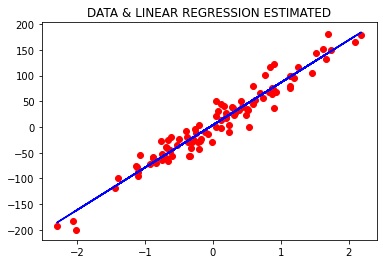

In [ ]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features= 1, noise= 20, random_state= 1)
X, y = torch.tensor(X_numpy, dtype=torch.float32), torch.tensor(y_numpy, dtype = torch.float32)
y = y.view(-1, 1) # == y.view(y.shape[0],1)

n_sample, n_features = X.shape
# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(in_features=input_size ,out_features=output_size)

# 2) loss and optimizer
learning_rate = 1e-2
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)   
    
    #backward pass
    loss.backward()
    
    #update weights
    optimizer.step()
    
    #reset the gradients
    optimizer.zero_grad()
    if (epoch + 1) % 100 ==0:
        print(f'epoch:{epoch}, loss: {loss:.4f}')    
        
# plot
predicted = model(X).detach() # require_grad = False, to plot
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.title('DATA & LINEAR REGRESSION ESTIMATED')
plt.show()

<a id="11"></a> 
### 11)IMPLEMENTING LINEAR REGRESSION (REGRESSION)<br>


[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# STEPS:
# 0) prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1234)

#scaling features
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# transform to tensor X and y
X_train_std = torch.tensor(X_train_std, dtype = torch.float32)
X_test_std = torch.tensor(X_test_std, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)
# reshaping our y vector, to be a column vector instead of a row vector
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
# 1) model
# f = w*x + b, sigmoid function at the end(activation function)
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted


model = LogisticRegression(n_features)

# 2) loss and optimizer
criteria = nn.BCELoss() # Binary cross entropy loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
# 3) training loop
n_epochs = 100

for epoch in range(n_epochs):
    # forward pass and loss
    y_predicted = model(X_train_std)
    loss = criteria(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update the weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss:.4f}')
    
# Evaluation
# we dont want to track the graph for this part
with torch.no_grad():
    y_predicted = model(X_test_std)
    #transform the probability results to the two labels (0, 1)
    y_predicted_classes = y_predicted.round()
    accuracy = (y_predicted_classes == y_test).sum()/y_test.shape[0]
    print(f'accuracty = {accuracy:.4f}')

epoch: 10, loss: 0.4372
epoch: 20, loss: 0.3824
epoch: 30, loss: 0.3434
epoch: 40, loss: 0.3140
epoch: 50, loss: 0.2909
epoch: 60, loss: 0.2723
epoch: 70, loss: 0.2568
epoch: 80, loss: 0.2437
epoch: 90, loss: 0.2324
epoch: 100, loss: 0.2226
accuracty = 0.9123


<a id="12"></a> 
### 12)DATASETS AND DATALOADERS CLASSES<br>


[Ir a índice](#indice)
#### *Vocabulary*
* epoch = 1 forward and backward pass of **ALL** training samples

* batch_size = number of training samples in one forward & backward pass

* number of iterations = number of passes, each pass using 'batch_size' number of samples

* e.g. 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class Winedataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = np.loadtxt('./intro_pytorch_wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
        self.x = torch.tensor(xy[:, 1:], dtype = torch.float32)
        self.y = torch.tensor(xy[:, [0]], dtype = torch.float32) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples
    
dataset = Winedataset()

#################### DATALOADER ####################

dataloader = DataLoader(dataset = dataset, batch_size= 4, shuffle= True)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = round(total_samples/4) # batch_size = 4

print(f'total_samples: {total_samples}, n_iterations: {n_iterations}')

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader): # i will give us the index
        if (i + 1) % 5 == 0:
            print(f'epoch : {epoch + 1}/{num_epochs}, step: {i + 1}/{n_iterations}, inputs: {inputs.shape}')
            


total_samples: 178, n_iterations: 44
epoch : 1/2, step: 5/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 10/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 15/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 20/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 25/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 30/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 35/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 40/44, inputs: torch.Size([4, 13])
epoch : 1/2, step: 45/44, inputs: torch.Size([2, 13])
epoch : 2/2, step: 5/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 10/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 15/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 20/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 25/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 30/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 35/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 40/44, inputs: torch.Size([4, 13])
epoch : 2/2, step: 45/44, inputs: torch.Size([2

In [ ]:
cont = 0
for X,y in dataloader:
    print(X, y)
    cont+=1
    print(cont)
    break

tensor([[1.2340e+01, 2.4500e+00, 2.4600e+00, 2.1000e+01, 9.8000e+01, 2.5600e+00,
         2.1100e+00, 3.4000e-01, 1.3100e+00, 2.8000e+00, 8.0000e-01, 3.3800e+00,
         4.3800e+02],
        [1.2820e+01, 3.3700e+00, 2.3000e+00, 1.9500e+01, 8.8000e+01, 1.4800e+00,
         6.6000e-01, 4.0000e-01, 9.7000e-01, 1.0260e+01, 7.2000e-01, 1.7500e+00,
         6.8500e+02],
        [1.2840e+01, 2.9600e+00, 2.6100e+00, 2.4000e+01, 1.0100e+02, 2.3200e+00,
         6.0000e-01, 5.3000e-01, 8.1000e-01, 4.9200e+00, 8.9000e-01, 2.1500e+00,
         5.9000e+02],
        [1.2210e+01, 1.1900e+00, 1.7500e+00, 1.6800e+01, 1.5100e+02, 1.8500e+00,
         1.2800e+00, 1.4000e-01, 2.5000e+00, 2.8500e+00, 1.2800e+00, 3.0700e+00,
         7.1800e+02]]) tensor([[2.],
        [3.],
        [3.],
        [2.]])
1


<a id="13"></a> 
### 13)DATASETS AND DATALOADERS CLASSES<br>



Pytorch library, has the module `torchvision` with transforms which can be applied to PIL images, tensors, ndarrays, or custom data during creation of the Dataset:    
* On Images:
        CenterCrop, Greyscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale.
* On Tensors:
        LinearTransformation, Normalize, RandomErasing
        
* Conversion:
        ToPILImage: from tensor or ndarray
        ToTensor: from numpy.ndarray or PILImage
* Generic:
        Use Lambda
* Custom:
        Write own class
* Compose multiple Transforms:

        composed = transforms.Compose([Rescale(256), RandomCrop(224)])
        torchvision.transforms.ReScale(256)
        torchvision.transforms.ToTensor()

[Ir a índice](#indice)
    

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
# Doing differents transform from scratch

class Winedataset(Dataset):
    
    def __init__(self, transform = None):
        # data loading
        xy = np.loadtxt('./intro_pytorch_wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
        # Note that we do not convert to tensor here.
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        return sample
        
    def __len__(self):
        return self.n_samples
       
######################### Custom Transformation by scratch #########################
class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return torch.tensor(inputs), torch.tensor(targets)

class MulTransform(): # multiplication transform, recives factor (the number which will use to multiplicate)
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        input, target = sample
        input *= self.factor
        return input, target
    
    
dataset = Winedataset(transform = None)

first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(),
                                           MulTransform(factor = 2)])

dataset = Winedataset(transform = composed)

first_data = dataset[0]
features, labels = first_data
print(f'\n Here we see how the tensor its multuplicated by the factor : {2}\n {features}')
print(type(features), type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>

 Here we see how the tensor its multuplicated by the factor : 2
 tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


<a id="14"></a> 
### 14)SOFTMAX AND CROSS-ENTROPY<br>

[Ir a índice](#indice)

In [ ]:
# Softmax function from scratch
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print(f'softmax numpy: {outputs}')


x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = -1) # automatically find the correct dimension 'dim = -1'
print(f'softmax numpy (with tensors): {outputs}')

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax numpy (with tensors): tensor([0.6590, 0.2424, 0.0986])


If we applied a softmax function and after we want to calculate the Cross - Entropy, to find how well our **CLASIFICATION MODEL** performs.

In [ ]:
# Cross-entropy from scratch
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # if we want to normalice it '/float(predicted.shape[0])'

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy:{l1:.4f}')
print(f'Loss2 numpy:{l2:.4f}')

Loss1 numpy:0.3567
Loss2 numpy:2.3026


# **nn.CrossEntropyLoss**<br>
#### This function applies nn.LogSoftmax + nn.NLLLoss(negative log likelihood loss)

## `No need a Softmax in the last layer!`

*   Y has class labels, not One-Hot!
*   Y_pred has raw scores (logits), no Softmax!


In [ ]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1]) #Y_true (not one hot encoded)
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.0, 3.0, 0.1]])
Y_pred_bad = torch.tensor([ [2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)


print(f'Loss1 pred_good: {l1.item():.4f}')
print(f'Loss2 pred_bad:  {l2.item():.4f}')

################### PREDICTIONS ###################

_, predictions1 = torch.max(Y_pred_good, dim = 1) #in '_' we save the value of the tensor, which we dont need
_, predictions2 = torch.max(Y_pred_bad,  dim = 1)

print(predictions1)
print(predictions2)


Loss1 pred_good: 0.3002
Loss2 pred_bad:  1.6242
tensor([2, 0, 1])
tensor([0, 2, 1])


<a id="15"></a> 
### BINARY CLASS CLASSIFICATION PROBLEMS

Here we have to use `nn.BCELoss()` Sigmoid at the end, where we set a threshold (i.e. 0 = not dog, 1 = dog)

[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn

#Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1) # 1 label of output (dog or not dog), so output_size = 1
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        # sigmoid at the end
        y_pred = torch.sigmoid(out) # SIGMOID FUNCTION
        return y_pred
    
model = NeuralNet1(input_size = 28*28, hidden_size = 5)
criterion = nn.BCELoss()


<a id="16"></a> 
### MULTI CLASS CLASSIFICATION PROBLEMS<br>
* Neural Net with Softmax (which animal?)

Here we have to use `nn.CrossEntropyLoss()` Sigmoid at the end, where we set a threshold (i.e. 0 = not dog, 1 = dog)

[Ir a índice](#indice)

In [ ]:
import torch 
import torch.nn as nn

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes) # the last layer, the output size is equal to the 
                                                           # number of classes, each class has it's own output
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #(applies Softmax)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Create our functions from nn modules
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
# FIRST WE DEFINE ALL THE LAYERS THAT WE WANT
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
# CALL THE FUCTIONS ONE AFTER ANOTHER
        out = F.linear1(x) # out = self.linear1(x)
        out = F.relu(out) # self.relu(out)
        out = F.linear2(out)# ...
        out = F.sigmoid(out)# ...
        return out
        

<a id="17"></a> 
### FEED FORWARD NETWORKS<br>

Using all the previous steps to train a nn<br>
[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # if we have GPU we will use it, if not, we use cpu.

# hyper parameters
input_size = 784 # our inputs from MNIST have a resolution of 28x28=784 if we flatten it.
hidden_size = 100 
num_classes = 10 # digits from 0-9
num_epochs = 2
batch_size = 100
learning_rate = 1e-3

# MNIST
train_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = False, transform = transforms.ToTensor(), download = False)

# DataLoader, Transformation
train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

# # testing the first batch of our dataloader 'torch.Size([100, 1, 28, 28])' 100 its the size of the batch, channels, width, height
# for i, (samples, labels) in enumerate(train_dataloader):
#     if i == 0:
#      print(samples.shape, labels.shape)   
#      break
# ##Plotting the data of training##
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(samples[i][0],cmap = 'gray')
# plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # now we create our layers
        self.l1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        # self.relu = nn.ReLU()
        self.l2 = nn.Linear(in_features=hidden_size, out_features=num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = F.relu(out)
        out = self.l2(out)
        return out
        # note: we do not use the softmax activation function at the exit of l2 because 
        # we use CrossEntropyLoss which already has the softmax applied at the exit.
        
        
model = NeuralNet(input_size, hidden_size, num_classes)

# define the loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# Training Loop (batch training) 
number_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
    for i,(X_train, y_train) in enumerate(train_dataloader):
        # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
        X_train = X_train.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
        y_train = y_train.to(device) # send the data to GPU
        
        # Forward Pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Clean the gradients
        optimizer.zero_grad()
        # Backward Pass
        loss.backward()
        # Update the weights
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{number_total_steps}, loss: {loss.item():.4f}')

# Testing
with torch.no_grad():
    n_correct_predictions = 0
    n_samples = 0
    for X_test, y_test in test_dataloader:
        # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
        X_test = X_test.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
        y_test = y_test.to(device) # send the data to GPU    
        outputs = model(X_test)
        
        #return value, index = _, predictions
        _, predictions = torch.max(outputs, dim = 1)
        n_samples +=y_test.shape[0]
        n_correct_predictions += (predictions == y_test).sum()
    
    accuracy = 100.0 * n_correct_predictions / n_samples
    print(f'Accuracy: {accuracy:.2f}')

epoch: 1/2, step: 100/600, loss: 0.4575
epoch: 1/2, step: 200/600, loss: 0.3064
epoch: 1/2, step: 300/600, loss: 0.5675
epoch: 1/2, step: 400/600, loss: 0.1916
epoch: 1/2, step: 500/600, loss: 0.1967
epoch: 1/2, step: 600/600, loss: 0.3065
epoch: 2/2, step: 100/600, loss: 0.2409
epoch: 2/2, step: 200/600, loss: 0.0832
epoch: 2/2, step: 300/600, loss: 0.1951
epoch: 2/2, step: 400/600, loss: 0.1976
epoch: 2/2, step: 500/600, loss: 0.1945
epoch: 2/2, step: 600/600, loss: 0.1917
Accuracy: 95.72


<a id="18"></a> 
### CONVOLUTIONAL NEURAL NET (CNN)<br>

Building a CNN with CIFAR-10<br>
[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
# device = torch.device('mps')
# Hyper parameters
num_epochs = 10
batch_size = 4
learning_rate = 1e-3

# dataset has PILImage images of range [0. 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = './intro_pytorch_data', train = True, download= True, transform= transform)
test_dataset = torchvision.datasets.CIFAR10(root = './intro_pytorch_data', train = False, download= True, transform= transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Implement the Conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        out = self.pool(F.relu(self.conv1(x)))
        out = self.pool(F.relu(self.conv2(out)))
        out = out.view(-1, 16*5*5) #flatten
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out
    
model_cnn = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr = learning_rate)

n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
    for i,(X_train, y_train) in enumerate(train_dataloader):
        # origin shape :[4, 3, 32, 32] = 4, 3, 1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        
        # Forward pass and loss
        predictions = model_cnn(X_train)
        loss = criterion(predictions, y_train)
        # Clean gradients
        optimizer.zero_grad()
        # Backward Pass
        loss.backward()
        optimizer.step()
        
        if(i + 1) % 6250 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}')
print("Finished Training")
            
            
# Testing
with torch.no_grad(): # because we dont need the .backward()
    n_corrects = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for X_test, y_test in test_dataloader:
        y_test = y_test.to(device)
        X_test = X_test.to(device)
        outputs = model_cnn(X_test)
        # max returns (value, index)
        _, y_pred = torch.max(model_cnn(X_test), dim = 1)
        n_samples += y_test.size(0)
        n_corrects += (y_pred == y_test).sum()
        
        for i in range(batch_size):
            label = y_test[i]
            y_predicted = y_pred[i]
            if(label == y_predicted):
                n_class_correct[label]+=1
            n_class_samples[label]+=1
    accuracy = 100.0 * n_corrects / n_samples
    print(f'Accuracy of the cnn: {accuracy}%')
    
    for i in range(10):
        accuracy = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {accuracy}%')



<a id="19"></a> 
### TENSORBOARD WITH PYTORCH<br>

Using tensorboard in the FEEDFORWARD NET that we create before<br>
[Ir a índice](#indice)

To launch tensorboard in our program, we have to execute it first and then open the prompt terminal and go to the directory where our program is, and write.. (2 options):<br>

* `tensorboard --logdir=runs`
* `tensorboard --logdir=data/ --host localhost --port 8088` and navigated the browser to http://localhost:8088

note: we have to had installed tensorboard (pip install tensorboard) in our enviorment

To launch tensorboard with pytorch we need to :
* from torch.utils.tensorboard import SummaryWriter
* writer = SummaryWriter("runs/mnist") ["runs/mnist" is the default directory where will save the logfiles] // This will print in the tensorboard

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch: 1/2, step: 100/600, loss: 0.3541
epoch: 1/2, step: 200/600, loss: 0.3507
epoch: 1/2, step: 300/600, loss: 0.3879
epoch: 1/2, step: 400/600, loss: 0.3483
epoch: 1/2, step: 500/600, loss: 0.2650
epoch: 1/2, step: 600/600, loss: 0.4211
epoch: 2/2, step: 100/600, loss: 0.1659
epoch: 2/2, step: 200/600, loss: 0.1031
epoch: 2/2, step: 300/600, loss: 0.1983
epoch: 2/2, step: 400/600, loss: 0.1841
epoch: 2/2, step: 500/600, loss: 0.1412
epoch: 2/2, step: 600/600, loss: 0.1790
Accuracy: 95.42


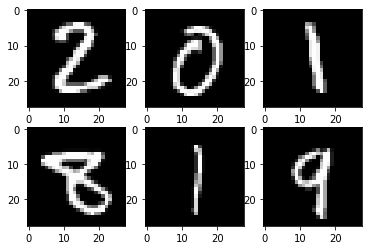

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
########################LAUNCH TENSORBOARD########################
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir='runs/MNIST')
########################LAUNCH TENSORBOARD########################

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # if we have GPU we will use it, if not, we use cpu.

# hyper parameters
input_size = 784 # our inputs from MNIST have a resolution of 28x28=784 if we flatten it.
hidden_size = 100 
num_classes = 10 # digits from 0-9
num_epochs = 2
batch_size = 100
learning_rate = 1e-3 # 1e-2

# MNIST
train_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = False, transform = transforms.ToTensor(), download = False)

# DataLoader, Transformation
train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

# # testing the first batch of our dataloader 'torch.Size([100, 1, 28, 28])' 100 its the size of the batch, channels, width, height
for i, (samples, labels) in enumerate(train_dataloader):
    if i == 0:
     print(samples.shape, labels.shape)   
     break
##Plotting the data of training##
# for i in range(6):
    # plt.subplot(2, 3, i+1)
    # plt.imshow(samples[i][0],cmap = 'gray')
# plt.show()

##############################TENSORBOARD##############################
img_grid = torchvision.utils.make_grid(samples) # first we want to create a grid with the train data
writer.add_image('mnist_images', img_grid)
# writer.close()
# sys.exit() # to exit from the program
##############################TENSORBOARD##############################

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # now we create our layers
        self.l1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        # self.relu = nn.ReLU()
        self.l2 = nn.Linear(in_features=hidden_size, out_features=num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = F.relu(out)
        out = self.l2(out)
        return out
        # note: we do not use the softmax activation function at the exit of l2 because 
        # we use CrossEntropyLoss which already has the softmax applied at the exit.
        
        
model = NeuralNet(input_size, hidden_size, num_classes)

# define the loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
##############################TENSORBOARD##############################
writer.add_graph(model, samples.view(-1, 28*28))
writer.close()
# sys.exit() # to exit from the program
##############################TENSORBOARD##############################

# Training Loop (batch training) 
number_total_steps = len(train_dataloader)

##############################TENSORBOARD##############################
# creating a loss and accuracy graph in Tensorboard
running_loss = 0.0
running_corrects = 0.0
##############################TENSORBOARD##############################
for epoch in range(num_epochs):
    for i,(X_train, y_train) in enumerate(train_dataloader):
        # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
        X_train = X_train.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
        y_train = y_train.to(device) # send the data to GPU
        
        # Forward Pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Clean the gradients
        optimizer.zero_grad()
        # Backward Pass
        loss.backward()
        # Update the weights
        optimizer.step()

        ##############################TENSORBOARD##############################
        # creating a loss and accuracy graph in Tensorboard
        running_loss += loss.item()
        _, predictions = torch.max(outputs, dim = 1)
        running_corrects += (predictions == y_train).sum().item()
        ##############################TENSORBOARD##############################
        if (i + 1) % 100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{number_total_steps}, loss: {loss.item():.4f}')
            ##############################TENSORBOARD##############################
            # adding accuracy and loss curve stepwise to the TENSORBOARD
            writer.add_scalar('training loss', running_loss / 100, epoch * number_total_steps + i)
            writer.add_scalar('accuracy', running_corrects / 100, epoch * number_total_steps + i)
            running_loss = 0.0
            running_corrects = 0.0
            ##############################TENSORBOARD##############################
# Testing
##############################TENSORBOARD##############################
# creating a precision recall curve in Tensorboard
labels = []
preds = []
##############################TENSORBOARD##############################
with torch.no_grad():
    n_correct_predictions = 0
    n_samples = 0
    for X_test, y_test in test_dataloader:
        # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
        X_test = X_test.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
        y_test = y_test.to(device) # send the data to GPU    
        outputs = model(X_test)
        
        #return value, index = _, predictions
        _, predictions = torch.max(outputs, dim = 1)
        n_samples +=y_test.shape[0]
        n_correct_predictions += (predictions == y_test).sum()
        ##############################TENSORBOARD##############################
        # we need probabilities, so we will applied a softmax function to the output of the nn
        class_predictions = [F.softmax(output, dim = 0) for output in outputs] # we calculate the softmax for each output in ouputs
        
        preds.append(class_predictions)
        labels.append(predictions)
    
    preds = torch.cat([torch.stack(batch) for batch in preds])
    labels = torch.cat(labels) #concatenate all the elements in our list in one dimensional tensor
        ##############################TENSORBOARD##############################
    
    accuracy = 100.0 * n_correct_predictions / n_samples
    print(f'Accuracy: {accuracy:.2f}')
    
    ##############################TENSORBOARD##############################
    #we add the precision recall curve to Tensorboar
    classes = range(10) # digits from 0-9
    for i in classes:
        labels_i = labels == i
        preds_i = preds[:, i]
        writer.add_pr_curve(str(i),labels_i,preds_i, global_step = 0)
        writer.close()
    ##############################TENSORBOARD##############################

#### HYPERPARAMETER SEARCH (BEST LEARNING RATE & BATCH SIZE MATCH TOGETHER) WITH **TENSORBOARD**

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir='runs/MNIST')

#device config
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # if we have GPU we will use it, if not, we use cpu.
device = torch.device('mps') #mac

# hyper parameters
input_size = 784 # our inputs from MNIST have a resolution of 28x28=784 if we flatten it.
hidden_size = 100 
num_classes = 10 # digits from 0-9
num_epochs = 1

# MNIST
train_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './intro_pytorch_data', train = False, transform = transforms.ToTensor(), download = False)


# # testing the first batch of our dataloader 'torch.Size([100, 1, 28, 28])' 100 its the size of the batch, channels, width, height
# for i, (samples, labels) in enumerate(train_dataloader):
#     if i == 0:
#      print(samples.shape, labels.shape)   
#      break
# ##Plotting the data of training##
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(samples[i][0],cmap = 'gray')
# plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # now we create our layers
        self.l1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        # self.relu = nn.ReLU()
        self.l2 = nn.Linear(in_features=hidden_size, out_features=num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = F.relu(out)
        out = self.l2(out)
        return out
        # note: we do not use the softmax activation function at the exit of l2 because 
        # we use CrossEntropyLoss which already has the softmax applied at the exit.
        
        
batch_sizes = [2, 64, 1024]
learning_rates = [1e-1, 1e-2, 1e-4]

for batch_size in batch_sizes:
    
    for learning_rate in learning_rates:
        step_test = 0 #global step for tensorboard(test)    
        step = 0 #global step for tensorboard(train)    
        model = NeuralNet(input_size, hidden_size, num_classes)
        model.to(device)
        model.train()
        
        writer = SummaryWriter(f'runs/MNIST/MiniBatchSize: {batch_size} LR: {learning_rate}')
        
        # DataLoader, Transformation
        train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
        test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)
        
        # define the loss function and Optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
        # Training Loop (batch training) 
        number_total_steps = len(train_dataloader)
        
        ##############################TENSORBOARD##############################
        # creating a loss and accuracy graph in Tensorboard
        running_loss = 0.0
        running_corrects = 0.0
        ##############################TENSORBOARD##############################
        for epoch in range(num_epochs):
            for i,(X_train, y_train) in enumerate(train_dataloader):
                # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
                X_train = X_train.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
                y_train = y_train.to(device) # send the data to GPU
                
                # Forward Pass
                outputs = model(X_train)
                loss = criterion(outputs, y_train)
                
                # Clean the gradients
                optimizer.zero_grad()
                # Backward Pass
                loss.backward()
                # Update the weights
                optimizer.step()

                ##############################TENSORBOARD##############################
                # creating a loss and accuracy graph in Tensorboard
                running_loss += loss.item()
                _, predictions = torch.max(outputs, dim = 1)
                running_corrects += (predictions == y_train).sum().item()
                
                # adding accuracy and loss curve stepwise to the TENSORBOARD
                writer.add_scalar('training loss', loss, global_step = step)
                writer.add_scalar('trining accuracy', running_corrects / y_train.size(0), global_step = step) 
                running_loss = 0.0
                running_corrects = 0.0
                step+=1 #global step for tensorboard
                ##############################TENSORBOARD##############################
                if (i + 1) % 15000 == 0:
                    print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1}/{number_total_steps}, loss: {loss.item():.4f}')
                    
        # Testing
        with torch.no_grad():
            step_test += 1 #global step for tensorboard(test) 
            n_correct_predictions = 0
            n_samples = 0
            for X_test, y_test in test_dataloader:
                # we have to reshape the data from 100, 1, 28, 28 to 100, 784(100 = num of batches, 784 = number of inputs)
                X_test = X_test.view(-1, 28*28).to(device) # we reshape and then send the data to GPU
                y_test = y_test.to(device) # send the data to GPU    
                model.eval()
                outputs = model(X_test)
                
                #return 'value', 'index' = '_', 'predictions'
                _, predictions = torch.max(outputs, dim = 1)
                n_samples +=y_test.shape[0]
                n_correct_predictions += (predictions == y_test).sum()
            
            accuracy_test = 100.0 * n_correct_predictions / n_samples
            writer.add_scalar('test accuracy', accuracy_test/100, global_step = step_test)
            print(f'Accuracy: {accuracy_test:.2f}, batch_size: {batch_size}')

epoch: 1/1, step: 15000/30000, loss: 1.9466
epoch: 1/1, step: 30000/30000, loss: 2.5383
Accuracy: 9.82, batch_size: 2
epoch: 1/1, step: 15000/30000, loss: 0.3414
epoch: 1/1, step: 30000/30000, loss: 0.0000
Accuracy: 90.37, batch_size: 2
epoch: 1/1, step: 15000/30000, loss: 0.0205
epoch: 1/1, step: 30000/30000, loss: 0.1926
Accuracy: 93.44, batch_size: 2
Accuracy: 71.08, batch_size: 64
Accuracy: 95.32, batch_size: 64
Accuracy: 89.35, batch_size: 64
Accuracy: 83.49, batch_size: 1024
Accuracy: 93.76, batch_size: 1024
Accuracy: 70.62, batch_size: 1024


**Interpretation for the results in TENSORBOARD:** <BR>
* *Smaller batch_sizes seems to correlate with lower learning rates, which can make sense because we are doing a lot of more updates, and when we compute gradients for largers batch_sizes, the gradient is more exact, so we can afford having a larger learning rate.*

<a id="20"></a> 
### SAVING AND LOADING MODELS<br>

[Ir a índice](#indice)

In [ ]:
import torch
import torch.nn as nn

######## SAVING THE COMPLETE MODEL ########
torch.save(model, 'model_file_name.pth')

# LOADING THE MODEL
model_in_gpu = torch.load('model_file_name.pth', map_location= 'cuda:0') # if we want to load the model direct into GPU
model_in_gpu.eval() # set the model in evaluation mode

################################################################################################
################################################################################################

######## ANOTHER WAY TO SAVE THE MODEL LIKE STATE DICT ########
torch.save.(model.state_dict(), 'model_file_name.pth')

# model must be created again with parameters
model = Model(*args, **kwargs) 
model.load_state_dict(torch.load("model_file_name.pth"))
model.eval()